python 3.10
matplotlib 3.5.2
pandas 1.4.3
numpy 1.23.1
sklearn 1.1.2
seaborn 0.12.0
graphviz 0.20.1 (graphviz-6.0.1 64-bit)

# 머신러닝 실습


## Part1. Linear regression(선형회귀) 실습
 - 월별로 지출 그래프를 그려보고, 이를 그래프에서 회귀선으로 표현

### 사용할 라이브러리 불러오기
1. 시각화 라이브러리, as로 이름 변경
2. 행렬,배열 라이브러리, as로 이름변경
3. Skleran에서 제공하는 LinearRegression 불러오기
4. Model 평가를 위해 mean_squared_error, r2_score 불러오기

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

### 사용할 데이터셋 생성
1. 1~12월까지의 수익을 각각 변수 months, expenditure로 표기하고 임의의 값을 지정 (단위: month=월, expenditure=만원)
2. np.array 명령어를 사용해 1행 12열 배열 생성
3. 변수.reshape(행,열) 명령어를 사용해 배열의 차원을 12행 1열로 변경
4. reshape에서 '-1'은 data의 size기반으로 행의 개수를 선정
  -> months의 경우 data가 12개이기 때문에 12행으로 변환

In [2]:
months = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
months = months.reshape(-1,1)
expenditure = np.array([40, 80, 75, 90, 111, 120, 129, 126, 138, 146, 165, 170])

### LinearRegression model 생성
1. LR 이라는 이름으로 LinearRegression model을 선언
2. LR model에 months , expenditure를 적용해 학습 -> 학습된 model은 선형회귀식(LinearRegression)으로 표현됨
3. 'model이름.predict(model)' 명령어로 학습된 model이 예측한 월별 수익 결과 확인 -> 결과를 expenditure_pred로 선언

In [4]:
LR = LinearRegression()
LR.fit(months, expenditure)
expenditure_pred=LR.predict(months)

### Model 평가하기
1. 'LR.coef_' 를 이용해 model이 예측한 회귀 수식의 coefficient값(기울기)을 확인가능
   절편은 intercept_
2. 생성된 예측 model의 평가 지표 확인하기
3. 'mean_squared_error(실제값,예측값)' 을 통해 MAE값 출력, 'r2_score(실제값,예측값)' 을 통해 R2값 출력
  - Mean Absolute Error(MAE) : 실제값과 예측값의 차이를 절댓값으로 변환해 평균한 것
  - Mean Squared Error(MSE) : 실제값과 예측값의 차이를 제곱해 평균한 것
  - Root Mean Squared Error(RMSE) : MSE값은 오류의 제곱을 구하므로 실제 오류 평균보다 커지는 특성이 있으므로 MSE에 루트를 씌움. 숫자가 작을수록 성능이 좋음
  - R²: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울 수록 예측 정확도가 높음

In [6]:
print(f"Coefficients:{LR.coef_}")
print(f"Intercept:{LR.intercept_}")
print(f'Mean squred error:%{mean_squared_error(expenditure, expenditure_pred):.2f}' )
print(f"Coefficients of determination :{r2_score(expenditure, expenditure_pred):.2f}")

Coefficients:[10.44055944]
Intercept:47.969696969697
Mean squred error:%70.99
Coefficients of determination :0.95


### 그래프로 시각화하기
  - plt.scatter(x,y,alpha) : 산점도를 그리는 명령어, x = x변수, y = y변수, c = 색상, alpha = 투명도
  - plt.plot(x,y) : 선을 그리는 명령어 x = x변수, y = y변수
  - plt.xlabel(""),plt.ylabel("") : x와 y의 이름 지정
  - plt.show() :plot 출력

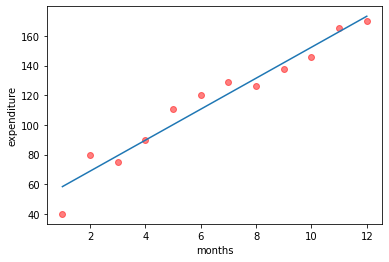

In [9]:
plt.scatter(months, expenditure, c='r', alpha=0.5)
plt.plot(months, expenditure_pred)
plt.xlabel('months')
plt.ylabel('expenditure')
plt.show()

## Part2. K-Nearest neighbors(최근접 이웃 분류)실습
 - iris data의 sepal length, width를 이용해 classification 해보기

### KNN classification 기본구조
1. KneighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
2. 중요 Hyperparameter = n_neighbors : 기본 neighbor의 수, weight : 가중치함수, algorithm : 계산알고리즘

### 사용할 라이브러리 불러오기
 -  
 - Data input과 시각화를 위해서 matplotlib.pyplot, numpy, seaborn library를 불러오기
 - Seaborn library : Data 시각화 관련 library로 matplot 기반에서 더 다양한 색상 테마와 차트 기능 추가
 - matplotlib.colors의 ListedColormap : 경계에 따라 colormap을 그려주는 시각화 라이브러리, colormap을 통해 classification된 영역을 한눈에 알아볼 수 있음
 - sklearn에서 제공하는 Iris(붓꽃) dataset을 이용하기 위해 sklearn의 'dataset'을 불러오기
 - sklearn에서 제공하는 classification model 중 'neighbors' 불러오기 
 - %matplotlib inline : 실행한 결과를 브라우저에서 바로 출력

In [2]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

### meshgrid 기초예제로 이해하기

In [3]:
# np,arrange로 배열 확인
x = np.arange(1,4,1)
y = np.arange(4,7,1)
print(x)
print(y)

[1 2 3]
[4 5 6]


In [4]:
# 생성된 배열로 mesh만들고 xx,yy로 선언
xx, yy = np.meshgrid(x,y)
print(xx)
print(yy)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]]


In [5]:
# .ravel()을 사용해 mesh를 list로 변환
xxr = xx.ravel()
yyr = yy.ravel()
print(xxr)
print(yyr)

[1 2 3 1 2 3 1 2 3]
[4 4 4 5 5 5 6 6 6]


In [6]:
# list들을 세로로 붙여 2차원 배열 형성
Z = np.c_[xxr,yyr]
print(Z)

[[1 4]
 [2 4]
 [3 4]
 [1 5]
 [2 5]
 [3 5]
 [1 6]
 [2 6]
 [3 6]]


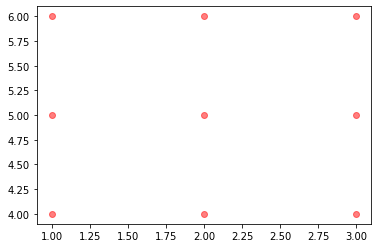

In [7]:
plt.scatter(xxr, yyr, c='r', alpha=0.5)
plt.show()

### 사용할 데이터셋 생성
 -  'datasets.load_iris()' 로 iris data를 load해 iris로 선언
 - X에는 iris data의 1,2번째 열까지 사용, y는 iris data에서 제공하는 target (0,1,2) = (setosa, versicolor, viginica) 선언
 - KNN은 supervised learning (지도학습) 이기 때문에 target data를 사용

In [8]:
iris = datasets.load_iris()
X=iris.data[:,:2]
y=iris.target

### KNN classifier model 생성
 - 'neighbors.KNeighborsClassifier(n_neighbors, weights=weights)' 을 통해서 model을 생성하고, n_neighbors의 값과, 가중치를 설정해 clf라고 선언
 - 'model이름.fit(X,y)' 로 변수 X,y를 modle에 적용, 'model이름.score(X,y)'로 model 평가

In [9]:
n_neighbors = 15
weights = 'distance'
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X,y)
clf.score(X,y)

0.9266666666666666

### 데이터 시각화 - 1
 - x,y축을 meshgrid로 변환해서 classification하고 색상으로 나타내기 위한 code
 - x_min, x_max = x축 data(IRIS의 0열)에 각각 min - 1, max + 1 으로 실제 값들 범위보다 plot 크기를 크게 잡기 위한 것
 -  y_min, y_max = y축 data(IRIS의 1열) 범위보다 plot크기가 크게 범위 설정
 - 'np.arrange(x,y,h)' : arrange 함수를 사용해 x ~ y(x_min ~ x_max) 까지 간격이 h인 배열을 선언
 - 'np.meshgird(x,y)' : meshgrid 함수로 x는 행으로 중복출력, y는 열로 중복 출력 -> x*y 의 mesh형성
 - 생성된 배열을 'model이름.predict()' 로 예측해 z로 선언

In [10]:
h = .02
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

### 데이터 시각화 - 2
1. 'ListedColormap([색상])' 함수를 사용해 Light(면)에 colormap을 형성할 수 있또록 색상 지정을 cmap_light로 선언
2. 'cmap_bold' 에 색상 지정

In [11]:
cmap_light = ListedColormap(['orange','cyan','cornflowerblue'])
cmap_bold = ['darkorange','c','darkblue']

 - 'Z.reshape()' 을 이용해 xx.shape와 같은 차원으로 Z를 재배열
 - 'plt.figure(figsize=(size지정))' : figure의 size를 지정
 - 'plt.contourf(X,Y,Z, camp=target)' : 분류된 영역 X,Y,Z(class) 에 지정된 target 색상으로 표현
 - 'sns.scatterplot(x,y,hue=변수이름지정,palette=색상지정,alpha=투명도,edgecolor=모서리색상지정)' : iris 산점도를 그릴 때 지정된 이름에 따라 점들에 색상을 입히도록 함
 - . iris.target_names는 'setosa, versicolor, virginica' 로 [y]는 0~2로 나누어 표현한 배열, iris.target_names[y]로 작성 시 y값의 0,1,2 에 각각의 이름이 부여됨
 -  'plt.xlim(), plt.ylim()' : x, y축의 최소, 최댓값을 설정
 - 'plt.tilte()' : plot의 제목을 설정
 -  'plt.xlabel(), plt.ylabel()' : x, y축의 이름을 지정, iris.feature_names[]로 지정된 feature의 이름을 x, y축에 적용

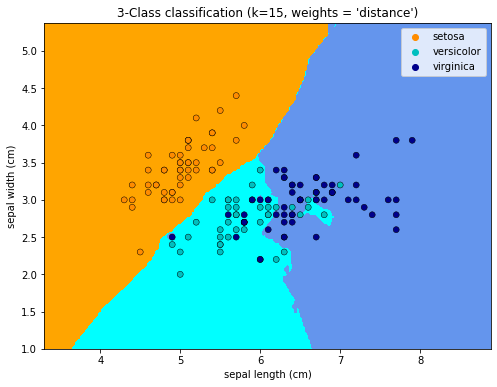

In [12]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(x=X[:, 0],y=X[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k=%i, weights = '%s')" % (n_neighbors, weights))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

## Part3. Decision tree_classification 실습
 - iris data를 train, test data로 split해 classification 하고 model 평가

### Decision tree의 기본 구조
 - DecisionTreeClassifier(*, criterion='gini', splitter='bset', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 - 중요 Hyperparameter 
  - criterion : gini/entropy 분할 품질 측정 방법
  - max_depth : 트리 최대 개수
  - min_samples_split : 노드 내의 최소 샘플 수
  - min_sample_leaf : 최하위 노드의 최소 샘플 수
  - max_leaf_nodes : 최하위 노드의 최대 수
  - max_features : 최적의 분할을 위해 고려할 최대 feature 수

### 사용할 라이브러리 불러오기
 - Sklearn에서 제공하는 sklearn.tree의 DecisionTreeClassifier 불러오기
 - Sklearn에서 제공하는 datasets 불러오기
 - Data를 train, test로 나누기 위해 sklearn.model_selection의 train_test_split 불러오기
 - Tree를 시각화하기 위해 sklearn.tree의 export_graphviz를 불러오기
 - Model을 평가하기 위한 sklearn.metrics의 accuracy_score 불러오기


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

### Dataset 설정
 - 'datsset.load_iris()' : iris data를 load하고 iris로 선언
 - 'train_test_split(X, Y, test_size=크기지정, random_state=변수지정)' : 학습용,평가용으로 data를 split하는 함수
  - X, Y라는 dataset을 X_train, X_test, y_train, y_test로 나누어줌
  - 'test_size' parameter를 이용해 dataset에서 test data의 비율 설정
  - 'random_state' parameter는 dataset 분할 시 shuffle의 시드값 설정


In [14]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

### Decision Tree model  생성
 - DecisionTreeClassifier model을 random_state 156으로 설정해 생성하고 DT_CLF로 선언
 - 학습용 train data를 'model이름.fit()' 을 이용해 model에 적용

In [15]:
DT_CLF = DecisionTreeClassifier(random_state=156)
DT_CLF.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

### 시각화를 위한 grapviz 파일 생성
  - export_graphviz() 함수를 사용해 graphviz 파일 생성
  - export_graphviz(출력할 model, out_file= "file 이름", class_names = class 이름지정, feature_names = feature 이름지정, impurity = True(불순도 출력), filled=True(색상채움)

In [16]:
export_graphviz(DT_CLF, out_file="Decision tree classification.dot", 
                class_names = iris.target_names, 
                feature_names = iris.feature_names, 
                impurity=True, filled=True)


### graphviz 불러와서 시각화 
 - 'with open(file 이름) as 이름' : 이전에 저장한 file을 open 하고 이름 부여
 - 'open된 file이름.read()' : file을 읽고 DT_graph로 선언
 - 'graphviz.Source' 함수를 이용해 graphviz 출력

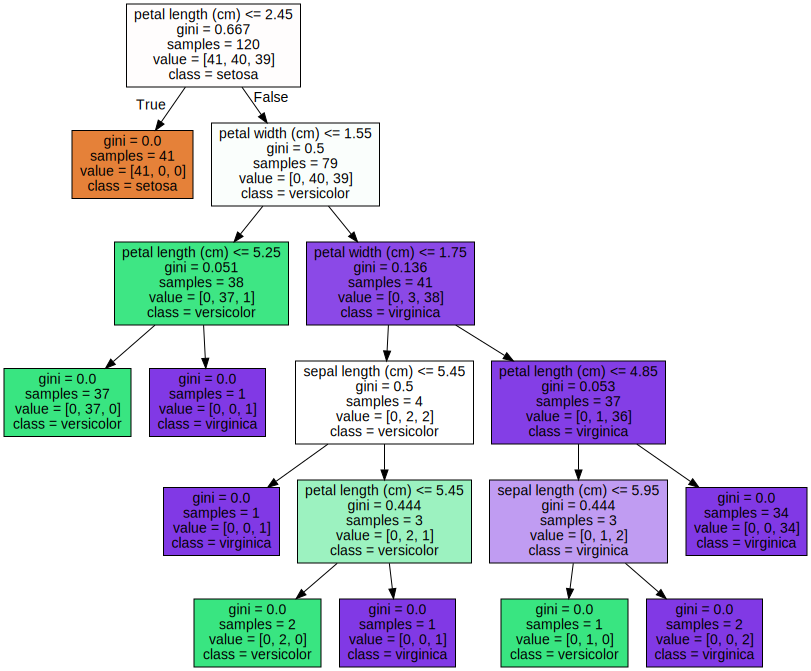

In [17]:
import graphviz

with open("Decision tree classification.dot") as visual:
  DT_graph = visual.read()
graphviz.Source(DT_graph)

### model 평가
 - train, test data 두가지의 accuracy를 확인 할 수 있음
 - 평가용 test data를 이용해 'model이름.predict()' 에 적용하면, 예측된 결과가 Test_DT_pred로 선언
 - 학습용 train data를 이용해 'model이름.predict()' 에 적용하면, 예측된 결과가 Train_DT_pred로 선언
 - 'accuracy_score(실제값, 예측값)'을 이용해 실제 y_test값과 예측된 Test_DT_pred의 정확도를 평가하고 AC_test에 저장
 - 'accuracy_score(실제값, 예측값)'을 이용해 실제 y_train값과 예측된 Train_DT_pred로 정확도를 평가하고 AC_train에 저장
 - 'print('...".format(accuracy score 이름))' : print함수를 이용해 출력

In [6]:
Test_DT_pred = DT_CLF.predict(X_test)
Train_DT_pred = DT_CLF.predict(X_train)

AC_test = accuracy_score(y_test, Test_DT_pred)
AC_train = accuracy_score(y_train, Train_DT_pred)

print("Test accuracy : {}".format(AC_test))
print("Train accuracy : {}".format(AC_train))
# Train data에 overfitting상태 (과적합)

Test accuracy : 0.9333333333333333
Train accuracy : 1.0


## Part4. K-Means clustering 실습
 - iris data를 이용해 clustering(unsupervised learning) 

### KMeans cluster 기본 구조
 - kmeans(n_cluster = 8,*,init = 'k-means++',n_init = 10, max_iter = 300, tol = 0.0001, verbose = 0, random_state = None, copy_x = True, algorithm = 'auto'
 - 중요 Hyperparameter : n_cluster : cluster 갯수

### 사용할 라이브러리 불러오기
 - Data input과 시각화를 위해서 matplotlib.pyplot, numpy, seaborn library를 불러오기
 - Sklearn에서 제공하는 iris(붓꽃) dataset을 이용하기 위해 sklearn의 datasets 불러오기
 - Sklearn에서 제공하는 cluster model 중 'KMeans' 불러오기
  - Iris dataset : 3가지 종류의 Iris(setosa, versicolor, virginica)의 feature (Sepal length(꽃받침의 길이), sepal width(꽃받침의 넓이), petal length(꽃잎의 길이), petal width(꽃잎의 넓이)를 포함

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

### 사용할 Dataset 설정

In [8]:
Iris = datasets.load_iris()
DATA = Iris.data

### Iris data 살펴보기

In [9]:
# iris datast : iris 품종과 그에 따른 특징값으로 이루어짐
# [a,b,c,d] 4가지 붗꽃의 특징값(feature)이 하나의 행을 이루고 있음
# iris.data 명령어로 iris의 data를 확인해보면 배열의 형태로 저장되 있음
x = iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
# iris.feature_names 명령어로 feature의 이름을 확인 가능
# Sepal length(꽃받침의 길이), sepal width(꽃받침의 넓이), petal length(꽃잎의 길이), petal width(꽃잎의 넓이) 로 이루어짐
z = iris.feature_names
z

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# iris.target 명령어로 iris feature와 대응되는 품종(target) 확인 가능
# target은 0,1,2로 3가지 종류로 이루어짐
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# iris.target_names 명령어로 target의 이름을 확인 가능
# setosa, versiolor, virginica 로 구성
a = iris.target_names
a

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### K-Means cluster model 생성
 - Kmeans 라이브러리의 KMeans model을 사용해 cluster를 3개(붓꽃의 종류가 3개라는 것을 이미 알기 때문에 3개로 설정)로 나누는 km_cluster 이름의 model()을 만들고 '.fit(Data이름)'을 이용해 iris data 적용
 - 'model이름.labels_'를 사용해 분리된 cluster들에게 label을 부여하고 cluster_pred로 선언

In [13]:
km_cluster = KMeans(n_clusters=3).fit(DATA)
cluster_pred = km_cluster.labels_

### Graph로 시각화 하기
 - iris data에는 다양한 data가 존재, 그 중 iris data의 0열을 X로, 1열을 Y로 지정
 - '.cluster_centers_'를 사용해 현재 지정된 cluster의 중심점을 cluster_center로 선언
 - 'plt.figsize(figsize=(x,y))' 로 plot의 size를 x,y로 지정
 - 'plt.title ('이름', fontsize=x)'로 plot의 이름,크기를 지정
 - 'plt.scatter(X,Y,c=z)' : X,Y에 대한 산점도를 그리고 color는 cluster_pred에 따라 다르게 지정
 - 'plt.plot()'에 cluster_cneter의 0열을 X, 1열을 Y로 지정하여 'rD' 다이아몬드 모양으로 지정하고, cluster center라는 label을 지정
 - 'plt.xlabel,plt.ylabel'을 통해 x,y축 이름과 크기 지정
 - 'plt.legend()' 를 통해서 legend 표시, 'plt.grid()를 통해서 grid표시

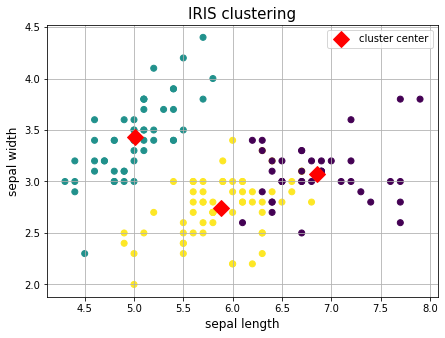

In [14]:
X = DATA[:,0]
Y = DATA[:,1]
cluster_center = km_cluster.cluster_centers_
plt.figure(figsize=(7,5))
plt.title("IRIS clustering", fontsize=15)
plt.scatter(X, Y, c=cluster_pred)
plt.plot(cluster_center[:,0], cluster_center[:,1], "rD", markersize=12, label='cluster center')
plt.xlabel("sepal length", fontsize=12)
plt.ylabel("sepal width", fontsize=12)
plt.legend()
plt.grid()
plt.show()

### Part5. Exercise - Wine데이터 classification하기


### Sklearn에서 제공하는 wine dataset에서 data와 target을 train,test data로 split하기
 - Data이름: wine, 설명: wine의 feature와 등급이 담긴 데이터
 - Wine feature data: alcohole, malic_acid, ahs, alkalinity_of_ahs 등 13개 특징. Wine target data= 0~2로 등급을 나눔
 - Data loading 방법: datasets.load_wine()
 - Parameter setting: test_size = 0.3, random_state = 10
 
 

### Train data를 이용해 decision tree, KNN 두 가지 classification 진행
 - Decision tree parameter setting: random_state = 10
 - KNN parameter setting: n_neighbors = 10, weights = distance

### Decision tree, KNN model을 평가하고 결과 비교
 - 평가방식: accuracy
 - print함수를 이용해 각 model accuracy 값을 출력

### Decision tree결과를 graphviz 이용해 시각화
 - 사용 라이브러리: export_graphviz
 - class_names에는 wine data의 target name을 feature_names에는 wine data의 feature name을 넣어서 export 하기
 - Export한 file을 불러와서 시각화 

Decision Tree Accuracy:0.91%
KNN Accuracy:0.91%


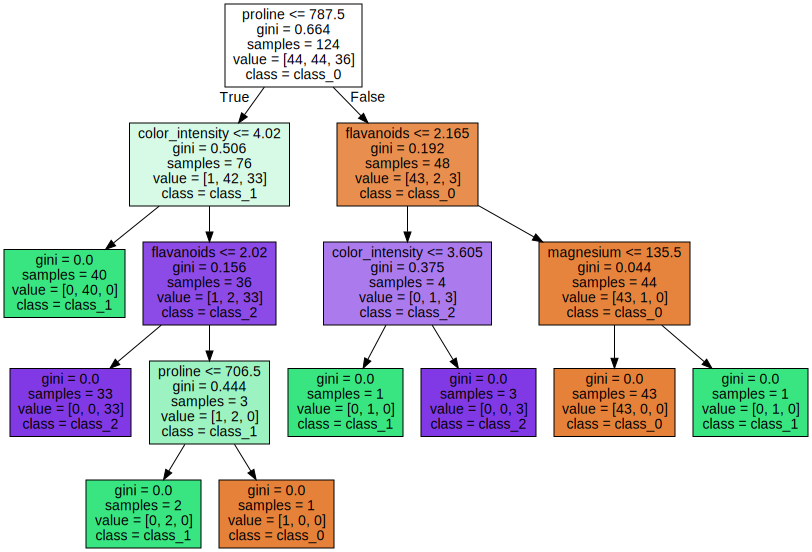

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

wine = datasets.load_wine()
data = wine.data
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=10)

DT_CLF = DecisionTreeClassifier(random_state=10)
DT_CLF.fit(x_train, y_train)
test_DT_pred=DT_CLF.predict(x_test)
AC_test = accuracy_score(y_test, test_DT_pred)
print(f'Decision Tree Accuracy:{AC_test:.2f}%')

clf = neighbors.KNeighborsClassifier(10, weights='distance')
clf.fit(x_train,y_train)
test_KNN_pred=DT_CLF.predict(x_test)
AC_test = accuracy_score(y_test, test_KNN_pred)
print(f'KNN Accuracy:{AC_test:.2f}%')

export_graphviz(DT_CLF, out_file="Decision tree classification.dot", class_names = wine.target_names, feature_names = wine.feature_names, impurity=True, filled=True)

with open("Decision tree classification.dot") as visual:
  DT_graph = visual.read()
graphviz.Source(DT_graph)

# Reference
1. Linear regression - https://eunsukimme.github.io/ml/2019/10/15/LinearRegression/
2. K-means clustering - https://yganalyst.github.io/ml/ML_clustering/
3. Scikitlearn example - https://scikit-learn.org/stable/auto_examples/index.html
4. Linear regressin - https://hleecaster.com/ml-linear-regression-example/
5. Mathplotlib - https://thisisprogrammingworld.tistory.com/m/61
6. Numpy.reshape - https://yganalyst.github.io/data_handling/memo_5/
7. Linear regression - https://nicola-ml.tistory.com/25
8. Scikit-learn dataset 다루기 - https://teddylee777.github.io/scikit-learn/scikit-learn-dataset
9. Decision tree classification - https://injo.tistory.com/15
10. Evaluation - https://gggggeun.tistory.com/17
11. Data split - https://ebbnflow.tistory.com/126